<a href="https://colab.research.google.com/github/emmenets/neuralnetwork/blob/master/190630yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
import imutils


from IPython.display import display, Javascript

import os, sys
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!mkdir /gdrive/My\ Drive/colabfiles/yolo/

Ordner erstellen

In [6]:
cd /gdrive/My\ Drive/colabfiles/yolo/


/gdrive/My Drive/colabfiles/yolo


In [0]:
!git clone https://github.com/pjreddie/darknet

In [9]:
cd darknet

/gdrive/My Drive/colabfiles/yolo/darknet


In [0]:
!make

In [0]:
!wget https://pjreddie.com/media/files/yolov3.weights

In [0]:
cp /party.jpg /gdrive/My\ Drive/colabfiles/yolo/darknet/data

In [22]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/party.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

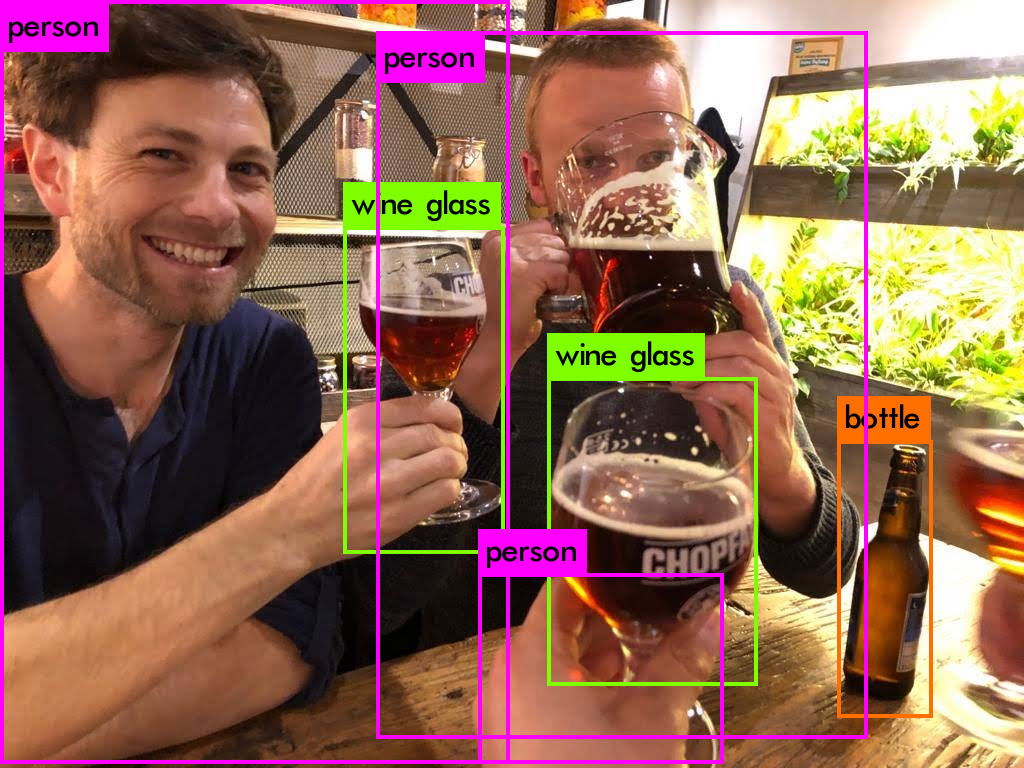

In [23]:
img = cv2.imread("/gdrive/My Drive/colabfiles/yolo/darknet/predictions.jpg")
cv2_imshow(img)

Verzeichnis löschen

In [0]:
path ="/gdrive/My Drive/colabfiles/rcnnopencv/"
tf.gfile.DeleteRecursively(path)